We are interested in studying function on points $z$ in the complex plane known as the perturbed doubling map, $$z \to z^2 +c$$ with $c$ a complex number. We will begin by setting $c = 0$, and calculating a collection of periodic points of the unperturbed map. The Julia set of the unperturbed map is the unit circle, $S$. We calculate periodic points of this map as rational numbers in the interval [0, 1], which is isomorphic to the unit circle in the complex plane. 

In [2]:
import pandas as pd
import math
import numpy as np
PC = [.05, .05]

A function to iterate a point $n$ times under the perturbed doubling map with the specificed perturbation constant $c.$ 

In [3]:
#function to iterate a point (with the perturbed doubling map) n times
#with perturbation constant c (default is unperturbed map iterated once)
def iteratePDM(point, n = 1, c=[0,0]): 
    x = point[0]
    
    y = point[1]
    
    if (n == 0): 
      return [x, y]
    for i in range(n):
        itX = x**2 - y**2 +c[0]
        #print(itX)
        itY = 2*x*y + c[1]
        #print(itY)
        x = itX
        y = itY
        #print("iterate{}: x: {}, y: {}".format(i+1, itX, itY) )
    itdPt = [itX, itY]
    return itdPt

A few useful functions to help with our calculations:  

In [4]:
#function conjugates a fraction (mod the interval [0,1] to a point on the unit circle
# since we want our orbits on the complex plane/r2 rather than on unit interval
def F2R2(n,d): 
    num = n%d
    x = math.cos(2*math.pi*(num/d))
    y = math.sin(2*math.pi*(num/d))
    return [x, y] #returns a list of the conjugate x and y coordinates

def ptDist(a, b): #get the euclidean distance between two points
    diffPt = []
    for i in range(len(a)):
        diffPt.append(a[i]-b[i])
    return np.linalg.norm(diffPt) 

def minIndex(theList): #function takes a list of numbers
                       #and returns the index of the list element with the least value
        minDex = 0
        minVal = theList[0]
        for i in range(len(theList)):
            if theList[i] < minVal:
                minDex = i
                minVal = theList[i]
        return minDex

def maxIndex(theList): #function takes a list of numbers
                       #and returns the index of the list element with the least value
        maxDex = 0
        maxVal = theList[0]
        for i in range(len(theList)):
            if theList[i] > maxVal:
                maxDex = i
                maxVal = theList[i]
        return maxDex  
    
def separateXY(pointList): #take a list of ordered pairs 
                            #and concatenate into two lists, x, and y. 
        xlist = []
        ylist = []
        for i in range(len(pointList)):
            xlist.append(pointList[i][0][0])
            ylist.append(pointList[i][0][1])
        return [xlist, ylist]

def separateXY2(pointList): #take a list of ordered pairs 
                            #and concatenate into two lists, x, and y. 
        xlist = []
        ylist = []
        for i in range(len(pointList)):
            xlist.append(pointList[i][0])
            ylist.append(pointList[i][1])
        return [xlist, ylist]      
    

# Sturmian Orbits

While studying periodic points of the family of perturbed doubling maps, in particular we are interested in Sturmian orbits. These are points whose orbit is entirely contained in a semi-circle. Here we write functions that help us determine if an orbit is Sturmian. Since orbits are calculated as rationals on the unit interval, this is the same and seeing if the orbit is contained in a sub-interval of length .5, where sub-intervals can be "wrapped" around from 1 to zero, since doubing on the unit interval is mod 1. 

In [5]:
#distance between two points in the interval [0,1] the "long way" (ie, distance moving from b
#to a passing through 1.0 (assuming b > a). 

def wrapDist(a, b):
    return (1.0-b)+a

#decide whether points in an orbit are contained ina  semi-circle (which makes it Sturmian)
#here this is decided by conjugate orbit as rationals in the unit interval [0,1]
#and seeing if they are contained within a closed interval (mod 1) of length 
#less than .5

def isSturmian(orbit, denom):
    ascOrbit = sorted(orbit)
    #print(ascOrbit)
    spread = 1.0
    period = len(ascOrbit)
    
    spread = (ascOrbit[period-1] - ascOrbit[0])/denom 
    
    if spread <= .5:
        return True
    else:
        for i in range(len(ascOrbit)-1):
            spread = wrapDist(((ascOrbit[i])/denom), (ascOrbit[(i+1)%(period)])/denom)
            if spread <=.5:
                return True 

            return False


When an orbit is Sturmian, we will be interested in the central angle of the semi-circle that contains the orbit. We will use this angle later to define a perturbation constant with direction exactly opposite (ie, +180 degrees) this central angle.  

In [10]:
def sturmianAngle(orbit, denom): #returns an angle (must be converted by multiply by 2pi/denom)
    ascOrbit = sorted(orbit)
    #print(ascOrbit)
    spread = 1.0
    period = len(ascOrbit)
    
    spread = (ascOrbit[period-1] - ascOrbit[0])/denom 
    
    if spread <= .5:
        angle = (ascOrbit[period-1] + ascOrbit[0])*.5
        return angle
    else: 
        for i in range(len(ascOrbit)):
            spread = wrapDist(((ascOrbit[i])/denom), (ascOrbit[(i+1)%denom])/denom)
            if spread <=.5:
                #angle = (ascOrbit[i] + ascOrbit[(i+1)%(period)])*.5 
                #print(spread)
                angle = ((ascOrbit[i+1] +((spread)*.5)*denom)) % denom
       
            return angle

# Periodic Points (of the unperturbed map) as rationals in [0, 1)

We can calculate periodic points/orbits of the unperturbed doubling map as rationals on the unit interval, which are conjugate to points in the Julia set of the unperturbed map in the complex plane via doubling (mod 1). We use a well-known algorithm to calculate such points. Points of period $n$ have denominator $2^n - 1$, and thus there will be $2^n-1$ periodic points with period $n$

In [11]:
#function caculates the periodic points of the doubling map
#that have period n

def calc_pOrbits(n): 
    orbit = [] #single list for a single orbit
    orbitList = [] #this will be a list of orbits (list of lists)
    pp_denom = 2**n - 1
    
    num_points = pp_denom
    num_points_so_far = 0
    
    num_list = set([]) #store elements in a set to guarentee uniqueness
    
    for x in range(0, num_points-1, n):
        pp_num = 1
        while pp_num in num_list: #only try numerators that have not been used yet
            pp_num += 1
            
        num_list.add(pp_num)
        
        orbit_start = pp_num
        orbit = []
        orbit.append(orbit_start)
        num_points_so_far +=1
        
        for y in range(1, n): 
            orbit.append((pp_num*2)%pp_denom)
            pp_num = (pp_num*2)%pp_denom
            num_list.add(pp_num)
            num_points_so_far +=1
      
        orbitSet = set(orbit)
        
        #identify duplicate orbits... ie, we'll find orbits of lower period 
        #in higher periods. ie, we might have period 2 orbits appearing as period 4 orbits
        #here we filter out if there are non unique points in the "orbit"
        
        if (len(orbitSet) != len(orbit)):
            #orbit = ["DUPE"]
            orbit.insert(0, "DUPE") #add "DUPE" in the dataframe to indicate duplicate orbit
        
        else: 
            
            if isSturmian(orbit, pp_denom):
                orbit.insert(0, sturmianAngle(orbit, pp_denom))
            else: 
                orbit.insert(0, 0)
            orbit.insert(0, isSturmian(orbit, pp_denom))
            
        orbit.insert(0, pp_denom)
        orbit.insert(0, n)
        
        orbitList.append(orbit)   
        
    return orbitList

We will want to deal with large collections of orbits, so here's a function to pack a collection of orbits into the useful format of a pandas dataframe

In [12]:
#push a list of orbits of a given period into a pandas dataframe
def orbitChart(n):
    #orbitN = calc_pOrbits(n)
  
    orbitTable = pd.DataFrame(calc_pOrbits(n))
    #orbitTable = orbitTable.astype(str) + '/{}'.format(2**n-1) 
    return orbitTable
    

Now we make a function that calculates periodic orbits for a range of periods, organizes them into a table, and labels the columns usefully

In [13]:
#function to generate a table of periodic orbits, ranging from period min to max
def OrbitTable(min, max):
    orbitList = []
    for x in range(min, max+1):
        orbitList.append(orbitChart(x))
    orbitTab = pd.concat(orbitList, ignore_index=True)
    orbitTab.rename(columns={0:'period', 1: 'denom', 2: 'sturmian', 3: 's-angle'}, inplace=True)

    #renumber/name columns to be 
    for x in range(4, 13):
        orbitTab.rename(columns={x: 'f{}'.format(x-4)}, inplace=True)
    return orbitTab

# Calculate Periodic Points of period 1 to n

Here we generate a table of all periodic orbits of the unperturbed doubling map from period 2 to 11

In [14]:
OT = OrbitTable(1, 7) #generate table of Orbits of desired range of periods
OT

,period,denom,sturmian,s-angle,f0,f1,f2,f3,f4,f5,f6
0,2,3,True,1.5,1,2,NaN,NaN,NaN,NaN,NaN
1,3,7,True,2.5,1,2,4.0,NaN,NaN,NaN,NaN
2,3,7,True,4.5,3,6,5.0,NaN,NaN,NaN,NaN
3,4,15,True,4.5,1,2,4.0,8.0,NaN,NaN,NaN
4,4,15,False,0.0,3,6,12.0,9.0,NaN,NaN,NaN
5,4,15,DUPE,5.0,10,5,10.0,NaN,NaN,NaN,NaN
6,4,15,True,10.5,7,14,13.0,11.0,NaN,NaN,NaN
7,5,31,True,8.5,1,2,4.0,8.0,16.0,NaN,NaN
8,5,31,False,0.0,3,6,12.0,24.0,17.0,NaN,NaN
9,5,31,True,12.5,5,10,20.0,9.0,18.0,NaN,NaN


# We mostly care about Sturmian Orbits

We filter this table so we only deal with Sturmian orbits and remove duplicates (ie, for example we'll get the same period 2 orbits showing up in orbits of period $2k$ for all $k \in \mathbb{N}$ and we only want to see them once). 

In [15]:
#filter out duplicate orbits
noDupes = OT['sturmian']!='DUPE'

filteredOT = OT[noDupes]

#filter out non-sturmian orbits
SturmianOrbits = filteredOT[filteredOT['sturmian']==True]

SturmianOrbits

,period,denom,sturmian,s-angle,f0,f1,f2,f3,f4,f5,f6
0,2,3,True,1.5,1,2,NaN,NaN,NaN,NaN,NaN
1,3,7,True,2.5,1,2,4.0,NaN,NaN,NaN,NaN
2,3,7,True,4.5,3,6,5.0,NaN,NaN,NaN,NaN
3,4,15,True,4.5,1,2,4.0,8.0,NaN,NaN,NaN
6,4,15,True,10.5,7,14,13.0,11.0,NaN,NaN,NaN
7,5,31,True,8.5,1,2,4.0,8.0,16.0,NaN,NaN
9,5,31,True,12.5,5,10,20.0,9.0,18.0,NaN,NaN
11,5,31,True,18.5,11,22,13.0,26.0,21.0,NaN,NaN
12,5,31,True,22.5,15,30,29.0,27.0,23.0,NaN,NaN
13,6,63,True,16.5,1,2,4.0,8.0,16.0,32.0,NaN


Let's grab any random sturmian orbit from the unperturbed map

In [17]:
rSOrbit = SturmianOrbits.sample(1)
rSOrbit

,period,denom,sturmian,s-angle,f0,f1,f2,f3,f4,f5,f6
1,3,7,True,2.5,1,2,4.0,NaN,NaN,NaN,NaN


We need a quick function to take the randomly selected sturmian orbit (which is stored as rationals in [0,1])
and reformats it as a set of points in $\mathbb{R}^2 / \mathbb{C}$

In [18]:
def F2R2Orbit(orbitKeys):
    r2Orbit = []
    for i in range (orbitKeys[2]):
        r2Orbit.append(F2R2(((2**i)*orbitKeys[0])%orbitKeys[1], orbitKeys[1]))
    return r2Orbit



We want to use the sturmian angle of the (randomly) chosen orbit to generate a perturbation constant $c$ in the direction opposite the sturmian semi-circle. We do that with the method that follows

In [21]:
#get the angle (in radians) opposite the central angle of a given sturmian orbit
#note that the sturmian angle is given as a rational number in [0,1], and must be converted 

def orbit2cAngle(orbit):
    denom = orbit.iloc[0]['denom']
    angle = (orbit.iloc[0]['s-angle']/denom + .5) 
    return angle*2*math.pi
    

#get a perturbation contant c that has a given angle and magnitude. Will feed the angle from 
#a sturmina orbit to this 
def orbit2c(angle, mag):
    c = [mag*(math.cos(angle)), mag*(math.sin(angle))]
    return c

def orbit2Ray(angle):
    c = [(math.cos(angle)), (math.sin(angle))]
    return c

#generate a perturbation constant based on the random sturmian orbit sampled above. 

testC = orbit2c(orbit2cAngle(rSOrbit), .001)
testRay = orbit2Ray(orbit2cAngle(rSOrbit))
testC

[0.0006234898018587333, -0.0007818314824680299]

We can graph the (randomly) chosen orbit so that we can visually confirm it's contained in some semi-circle. 

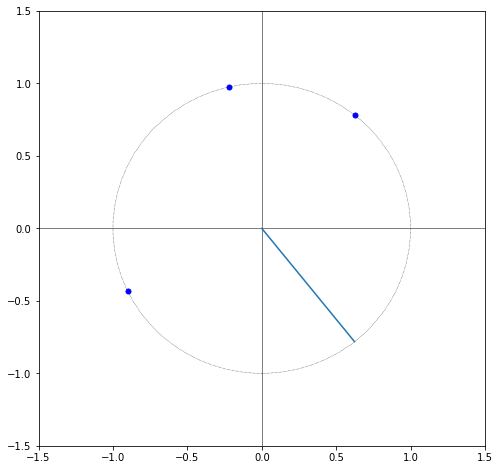

In [25]:
def orbitInfo(oDataF, row): #extract info from data frame of unperturbed orbits 
                            #to feed to pseudo orbit search function
    period = oDataF.iloc[row, 0] #extract period from row of dataframe
    denom = oDataF.iloc[row, 1] #extract the rational denominator for the orbit
    startpoint = oDataF.iloc[row, 4] #extract the first point in the orbit
    keys = [startpoint, denom, period]
    return keys



import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

#for i in range(len(porbitlist)):
    #print(porbitlist[i][0])
    
#pointcoords = separateXY(porbitlist)
#print(pointcoords)
#plot the conjugate (perturbed) periodic points
#plt.plot(pointcoords[0], pointcoords[1], 'ro', markersize=10)

plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.plot([-1.5, 1.5], [0, 0], 'k-', linewidth=.5 )
plt.plot([0, 0], [-1.5, 1.5], 'k-', linewidth=.5)
#plt.plot([0, PC[0]], [0, PC[1]])
plt.plot([0, testRay[0]], [0, testRay[1]])

test = F2R2(1, 3)
#plot the unperturbed periodic points

upoints = F2R2Orbit(orbitInfo(rSOrbit, 0))
#for i in range(SturmianOrbits.shape[0]):
    #upoints.append(F2R2(SturmianOrbits.iloc[i, 3], SturmianOrbits.iloc[i, 1]))

upointscoords = separateXY2(upoints)
    
plt.plot(upointscoords[0], upointscoords[1], 'bo', markersize=5.0)
circle1 = plt.Circle((0, 0), 1.0, color='k', fill=False, lw=.5, ls=':') #graph unit circle
fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle1)

The plot above shows the randomly chosen Sturmian orbit as well as vector from the origin that represents the direction of the pertubation constant $c$ that the orbit would generate (this is precisely the direction opposite the central angle of the semi-circle containing the orbit)

Now we are going to use the orbits we explictly calculated for the unperturbed map to estimate the points conjugate to these orbits in the perturbed map, where $c$ is in the direction indicated by the vector above. We'll do this by making some functions that generate a "search grid," ie, sample a bunch of points near a periodic point of period $n$, iterate these points $n$ times with the perturbed map, and figure out which is the "closest" to being a periodic point of period $n$. 

We can perform this recursively, ie, make a new, finer grid of test points centered on the closest-to-periodic point of each trial. We can keep performing this until we either get within a certain error margin of perioidicity, or for a finite number of iterations. 

In [23]:
#generate a grid of test points; it will have row X col points evenly dispersed 
#on a subset of r2 measuring width X height
#and will be 'centered' on the point in the 'center' argument 
def testMesh(rows, cols, width, height, center): 
    theMesh = []
    numPoints = rows*cols
    bottomCorner = [center[0]-(.5*width), center[1] -(.5*height)]
    xSpacing = width/cols
    ySpacing = height/rows
    for i in range(int(numPoints)):
        x = bottomCorner[0] + (i%cols)*xSpacing +.5*xSpacing
        y = bottomCorner[1] + (i//cols)*ySpacing +.5*ySpacing
        point = [x, y]
        theMesh.append(point)
    return theMesh    




#function to find a pseudo orbit in the perturbed map
#conjugate to the unperturbed periodic orbit passed to it. 

#input an array of test points, iterate them :period: times
#and return the point that is closest to itself after iteration 
#in order to find a pseudo orbit of period n
def orbitSearch(testPoints, period):
    iteratedTest = []
    minDrift = 0.
    closestMatch = []
    for i in range(len(testPoints)) : 
        #iterate each point in testPoints period times and store results in new array
        iteratedTest.append(iteratePDM(testPoints[i], period, testC))
    for i in range(len(testPoints)):
        nDrift = ptDist(testPoints[i], iteratedTest[i])
        if i==0:
            minDrift = nDrift #store distance between 1st test point and its nth iterate
        else: 
            if nDrift < minDrift: #if subsequent distances are less, grab that as current min
                minDrift = nDrift
                closestMatch = [testPoints[i], minDrift]
                            
    return closestMatch  

def pOrbitFinder(orbitkeys, depth): #::keys:: for an orbit (as rational in [0,1]) is a 3 element list
                             # of the form [numerator, denominator, period]
        
    uOrbit = F2R2(orbitkeys[0], orbitkeys[1])
    mesh = testMesh(100, 100, .2, .2, uOrbit)
    error = 1.0
    
    #####THRESHOLD HERE#########
    
    threshold = 1.0e-10 ##how close do we want to get to an orbit. 
    passes = 0
    while error > threshold:
    #for i in range(depth): #loop ::depth:: number of times, each time using the previous estimate
                           #to create a finer mesh to search
        estimate = orbitSearch(mesh, orbitkeys[2]) 
        #reinitialize mesh centered on previous estimate
        mesh = testMesh(200, 200, 2*estimate[1], 2*estimate[1], estimate[0])
        error = estimate[1]
        passes +=1
        if passes > depth: #check we haven't iterated more times than argument ::depth::
                            #in case threshold error is too ambitious, we avoid infinite wait.
            break
    
    return estimate

#testList = filteredOT.iloc[3, 0]
#testList

#pOrbitFinder(orbitInfo(filteredOT, 8), 3)

#function to take in a table of orbits of the unperturbed map
#and return a table of conjugate pseudo orbits of the perturbed map
def pOrbitTable(OrbitTable, c):
    orbitkey = []
    pOT = []
    for i in range(OrbitTable.shape[0]): #number of rows in data table 
        orbitkey = orbitInfo(OrbitTable, i)
        pOT.append(pOrbitFinder(orbitkey, 10)) #search for pseudo orbits with depth of 5
    return pOT

POTable = pOrbitTable(SturmianOrbits, testC)
POTable



[[[-0.49954879694858706, 0.8663854185038119], 2.0711820619995563e-11],
 [[0.6237852574953086, 0.7823760849736957], 4.9990724072409146e-11],
 [[-0.9002854894586978, 0.43387166780832837], 4.204745351208416e-11],
 [[0.9136198262868862, 0.4074425775516153], 3.129797697164483e-11],
 [[-0.9774073845463067, 0.20762585206846562], 1.7107466732557164e-11],
 [[0.9793921361930024, 0.20208992514319066], 2.572462270390204e-11],
 [[0.5293737721027079, 0.8490747153006651], 3.1845288025542374e-11],
 [[-0.6115250902242565, 0.7909791854443265], 4.3565336869658515e-11],
 [[-0.994134965845238, 0.1006934017749927], 7.814928181245681e-11],
 [[0.9800207316366958, 0.19893853761307448], 1.7501969450096246e-12],
 [[0.9993767345893535, 0.0007828070604374625], 2.8421972140809734e-08],
 [[0.8290394903326223, 0.5599223529871103], 1.1987402933259768e-07],
 [[0.4199014360066883, 0.9079610021582822], 4.1296398883065395e-07],
 [[-0.5691265026558181, 0.8221479064824415], 3.5869120616346734e-08],
 [[-0.9625512645128751, 0

Now we have estimates of the periodic points of the map $z \to z^2 + c$ conjugate to the periodic points we explictly calculated for $z \to z^2.$ C. Wolf has conjectured that if we generate the perturbation constant $c$ based on the angle of a given sturmian orbit, then the conjugate point to this orbit in the perturbed map will maximize the potential $\Phi$, where we have $$ \Phi (z)  = \int -\log |f'(z)| =   \int -\log |2z|$$



For periodic points of period $n$, this is equivalent to evaluating the sum $$\frac{1}{n}\sum\limits_{i=0}^{n-1}-\log|2f^i(z)|$$

We use the following method (which takes a list of points in the complex plane representing an orbit as an argument) to calculate this sum for a given periodic point

In [26]:
#calculate the average of our potential over an orbit. 
def avgPotential(orbit):
    period = len(orbit)
    pot = 0.0
    for i in range(period):
        pot += 2.0*(np.linalg.norm(orbit[i]))
    avPot = (pot/period)
    return avPot
   
        

To get these for the orbits we estimated, we feed the list of start points of the orbits and iterate them the proper number of times, store the full orbit in a list, then calculate $\Phi$ for that orbit. 

In [27]:
def calcPhiforPOrbits(pOrbits, orbits):
    PhiList = []
    for i in range(len(pOrbits)): #repeat this once for each periodic point
        orbit = [] #start a list with the start of the orbit
        for j in range(orbits.iloc[i]['period']): 
            orbit.append(iteratePDM(pOrbits[i][0], j, testC))
            
        PhiList.append(avgPotential(orbit))
    return PhiList 

In [28]:
edTable = SturmianOrbits.copy()
edTable.insert(len(edTable.columns), 'c-source', 0, allow_duplicates = False) #add a col to orbit table
edTable.at[rSOrbit.iloc[0].name, 'c-source'] = 1 #mark the orbit that generated c
edTable
#SturmianOrbits

,period,denom,sturmian,s-angle,f0,f1,f2,f3,f4,f5,f6,c-source
0,2,3,True,1.5,1,2,NaN,NaN,NaN,NaN,NaN,0
1,3,7,True,2.5,1,2,4.0,NaN,NaN,NaN,NaN,1
2,3,7,True,4.5,3,6,5.0,NaN,NaN,NaN,NaN,0
3,4,15,True,4.5,1,2,4.0,8.0,NaN,NaN,NaN,0
6,4,15,True,10.5,7,14,13.0,11.0,NaN,NaN,NaN,0
7,5,31,True,8.5,1,2,4.0,8.0,16.0,NaN,NaN,0
9,5,31,True,12.5,5,10,20.0,9.0,18.0,NaN,NaN,0
11,5,31,True,18.5,11,22,13.0,26.0,21.0,NaN,NaN,0
12,5,31,True,22.5,15,30,29.0,27.0,23.0,NaN,NaN,0
13,6,63,True,16.5,1,2,4.0,8.0,16.0,32.0,NaN,0


In [29]:
#reformat table to indicate which Sturmian orbit 
#has been used to generate the perturbation constant

edTable.at[rSOrbit.iloc[0].name, 'c-source'] = 1

In [285]:
edTable


,period,denom,sturmian,s-angle,f0,f1,f2,f3,f4,f5,f6,c-source
0,2,3,True,1.5,1,2,NaN,NaN,NaN,NaN,NaN,0
1,3,7,True,2.5,1,2,4.0,NaN,NaN,NaN,NaN,0
2,3,7,True,4.5,3,6,5.0,NaN,NaN,NaN,NaN,0
3,4,15,True,4.5,1,2,4.0,8.0,NaN,NaN,NaN,1
6,4,15,True,10.5,7,14,13.0,11.0,NaN,NaN,NaN,0
7,5,31,True,8.5,1,2,4.0,8.0,16.0,NaN,NaN,0
9,5,31,True,12.5,5,10,20.0,9.0,18.0,NaN,NaN,0
11,5,31,True,18.5,11,22,13.0,26.0,21.0,NaN,NaN,0
12,5,31,True,22.5,15,30,29.0,27.0,23.0,NaN,NaN,0
13,6,63,True,16.5,1,2,4.0,8.0,16.0,32.0,NaN,0


To view results of the experiment, add columns to our table of orbits to indicate which orbit has been used to generate the perturbation constant $c$, calculate $\Phi$ along each orbit, and note which conjugate orbit has maximized/minimized $\Phi$

In [30]:


edTable2 = SturmianOrbits.copy()
edTable2.insert(len(edTable2.columns), 'c-angle', '', allow_duplicates = False)
PhiList = calcPhiforPOrbits(POTable, SturmianOrbits)
edTable2.insert(len(edTable2.columns), 'Phi', PhiList, allow_duplicates = False)
edTable2.insert(len(edTable2.columns), 'Phi-Min', '', allow_duplicates = False)
edTable2.insert(len(edTable2.columns), 'Phi-Max', '', allow_duplicates = False)

edTable2.at[rSOrbit.iloc[0].name, 'c-angle'] = 'X'

edTable2.iat[minIndex(PhiList),  edTable2.columns.get_loc("Phi-Min")] = 'X' 
edTable2.iat[maxIndex(PhiList),  edTable2.columns.get_loc("Phi-Max")] = 'X'
edTable2
#SturmianOrbits

,period,denom,sturmian,s-angle,f0,f1,f2,f3,f4,f5,f6,c-angle,Phi,Phi-Min,Phi-Max
0,2,3,True,1.5,1,2,NaN,NaN,NaN,NaN,NaN,,2.000624,,
1,3,7,True,2.5,1,2,4.0,NaN,NaN,NaN,NaN,X,2.000897,,X
2,3,7,True,4.5,3,6,5.0,NaN,NaN,NaN,NaN,,1.999519,,
3,4,15,True,4.5,1,2,4.0,8.0,NaN,NaN,NaN,,2.000602,,
6,4,15,True,10.5,7,14,13.0,11.0,NaN,NaN,NaN,,1.999087,,
7,5,31,True,8.5,1,2,4.0,8.0,16.0,NaN,NaN,,2.000310,,
9,5,31,True,12.5,5,10,20.0,9.0,18.0,NaN,NaN,,2.000861,,
11,5,31,True,18.5,11,22,13.0,26.0,21.0,NaN,NaN,,1.999962,,
12,5,31,True,22.5,15,30,29.0,27.0,23.0,NaN,NaN,,1.998921,,
13,6,63,True,16.5,1,2,4.0,8.0,16.0,32.0,NaN,,2.000080,,


We note here that the current running of the experiment has shown us that the perturbation orbit has not maximized the potential. However, in many attempts, this has been the case. Note in this unsuccessful test, the orbit comes very close to maximizing the potential, and we surmise we may be suffering the effects of rounding error. 